In [47]:
# Import the dependencies.
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [48]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=180.00, high=180.00, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [49]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [50]:
from citipy import citipy

In [51]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

20

In [52]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [53]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [54]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [55]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | christchurch
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | dunedin
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | asau
Processing Record 9 of Set 1 | rungata
City not found. Skipping...
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | waipawa
Processing Record 12 of Set 1 | otane
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | hastings
Processing Record 17 of Set 1 | ngunguru
Processing Record 18 of Set 1 | tolaga bay
Processing Record 19 of Set 1 | russell
Processing Record 20 of Set 1 | gisborne
-----------------------------
Data Re

In [56]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,63.27,67,4,9.60,NZ,2023-01-18 04:14:36
1,Butaritari,3.0707,172.7902,81.32,79,61,20.29,KI,2023-01-18 04:14:39
2,Christchurch,-43.5333,172.6333,75.42,65,20,19.57,NZ,2023-01-18 04:14:27
3,Beringovskiy,63.0500,179.3167,-17.72,86,74,14.07,RU,2023-01-18 04:14:37
4,Dunedin,-45.8742,170.5036,60.80,75,27,4.00,NZ,2023-01-18 04:11:24
5,Nikolskoye,59.7035,30.7861,33.69,97,100,10.69,RU,2023-01-18 04:14:39
6,Asau,46.4333,26.4000,40.28,81,90,6.31,RO,2023-01-18 04:14:36
7,Leningradskiy,69.3833,178.4167,-22.00,93,95,9.89,RU,2023-01-18 04:14:37
8,Waipawa,-41.4122,175.5153,65.50,63,18,10.83,NZ,2023-01-18 04:14:41
9,Otane,-39.8833,176.6333,68.02,65,100,7.72,NZ,2023-01-18 04:14:40


In [57]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2023-01-18 04:14:36,-46.2817,169.8464,63.27,67,4,9.60
1,Butaritari,KI,2023-01-18 04:14:39,3.0707,172.7902,81.32,79,61,20.29
2,Christchurch,NZ,2023-01-18 04:14:27,-43.5333,172.6333,75.42,65,20,19.57
3,Beringovskiy,RU,2023-01-18 04:14:37,63.0500,179.3167,-17.72,86,74,14.07
4,Dunedin,NZ,2023-01-18 04:11:24,-45.8742,170.5036,60.80,75,27,4.00
5,Nikolskoye,RU,2023-01-18 04:14:39,59.7035,30.7861,33.69,97,100,10.69
6,Asau,RO,2023-01-18 04:14:36,46.4333,26.4000,40.28,81,90,6.31
7,Leningradskiy,RU,2023-01-18 04:14:37,69.3833,178.4167,-22.00,93,95,9.89
8,Waipawa,NZ,2023-01-18 04:14:41,-41.4122,175.5153,65.50,63,18,10.83
9,Otane,NZ,2023-01-18 04:14:40,-39.8833,176.6333,68.02,65,100,7.72


In [58]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

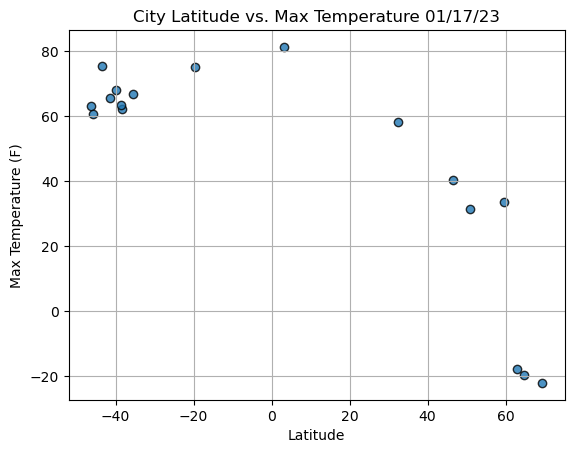

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

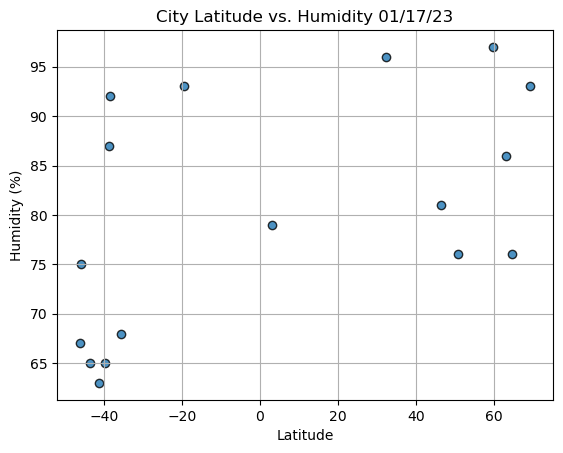

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

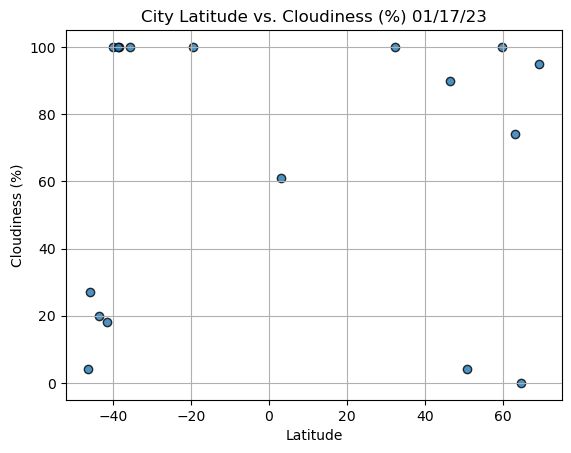

In [62]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [63]:
# Import linregress
from scipy.stats import linregress

In [64]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [66]:
index13 = city_data_df.loc[13]
index13

City                     Ngunguru
Country                        NZ
Date          2023-01-18 04:14:38
Lat                      -35.6167
Lng                         174.5
Max Temp                    66.92
Humidity                       68
Cloudiness                    100
Wind Speed                   8.43
Name: 13, dtype: object

In [67]:
city_data_df["Lat"] >= 0

0     False
1      True
2     False
3      True
4     False
5      True
6      True
7      True
8     False
9     False
10     True
11    False
12     True
13    False
14    False
15     True
16    False
Name: Lat, dtype: bool

In [69]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2023-01-18 04:14:39,3.0707,172.7902,81.32,79,61,20.29
3,Beringovskiy,RU,2023-01-18 04:14:37,63.0500,179.3167,-17.72,86,74,14.07
5,Nikolskoye,RU,2023-01-18 04:14:39,59.7035,30.7861,33.69,97,100,10.69
6,Asau,RO,2023-01-18 04:14:36,46.4333,26.4000,40.28,81,90,6.31
7,Leningradskiy,RU,2023-01-18 04:14:37,69.3833,178.4167,-22.00,93,95,9.89


In [70]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

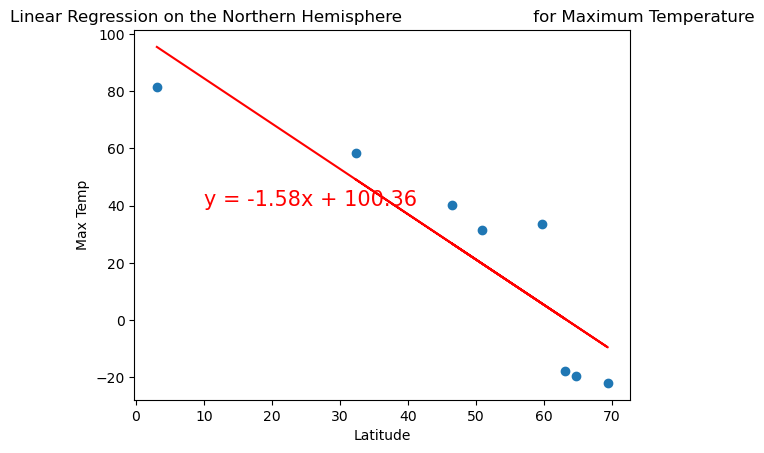

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

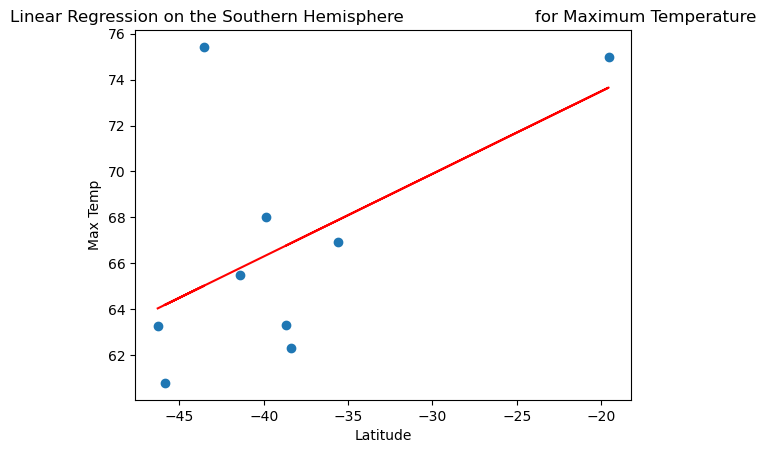

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

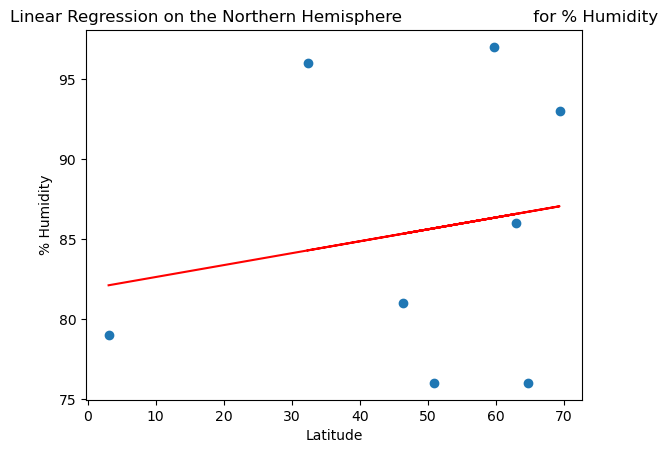

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

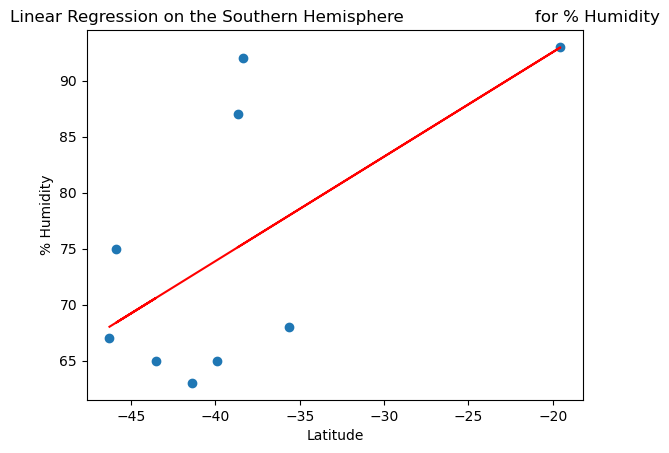

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

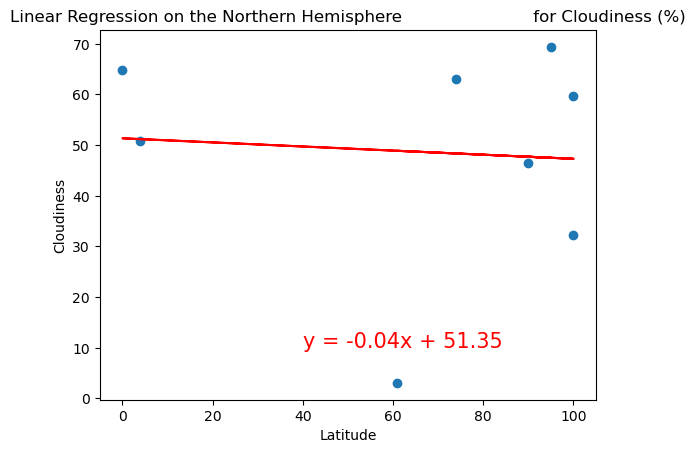

In [84]:
# SKill Drill 
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness (%)', 'Cloudiness',(40,10))

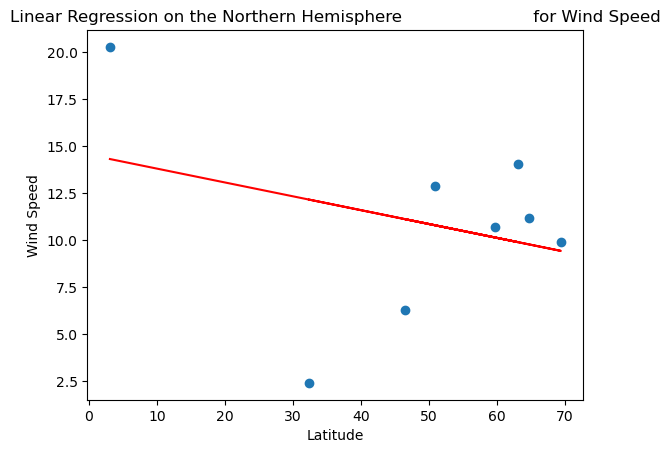

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

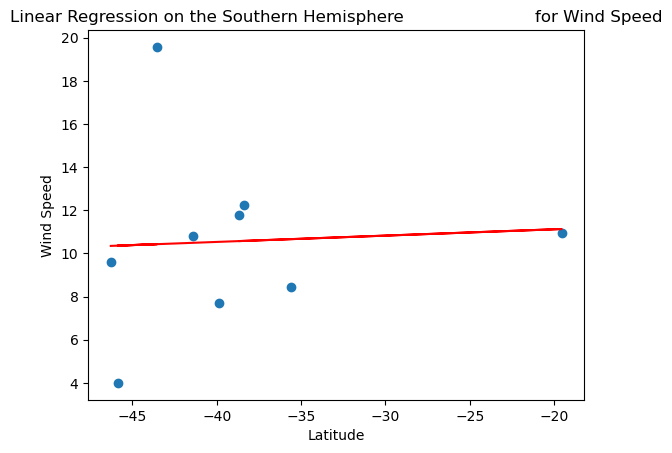

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))